In [9]:
import tensorflow
import numpy as np

In [10]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

### Because you’re restricting yourself to the top 10,000 most frequent words, no word index will exceed 10,000


In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [12]:
def vectorize_sequences(sequences,dimension=10000):
    result=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        result[i,sequence]=1
    return result

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [18]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
y_train=np.array(train_labels).astype('float32')
y_test=np.array(test_labels).astype('float32')

In [20]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [21]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [21]:
x_val=x_train[:10000]
x_partial=x_train[10000:]
y_val = y_train[:10000]
y_partial = y_train[10000:]

In [13]:
history=model.fit(x_partial,y_partial,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 361us/step - loss: 0.1797 - acc: 0.7743 - val_loss: 0.1249 - val_acc: 0.8683
Epoch 2/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.0969 - acc: 0.9011 - val_loss: 0.0977 - val_acc: 0.8833
Epoch 3/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.0687 - acc: 0.9276 - val_loss: 0.0885 - val_acc: 0.8862
Epoch 4/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.0532 - acc: 0.9433 - val_loss: 0.0845 - val_acc: 0.8875
Epoch 5/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.0437 - acc: 0.9552 - val_loss: 0.0848 - val_acc: 0.8849
Epoch 6/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.0348 - acc: 0.9667 - val_loss: 0.0855 - val_acc: 0.8837
Epoch 7/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.0305 - acc: 0.9703 - val_loss: 0.0849 - 

In [22]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

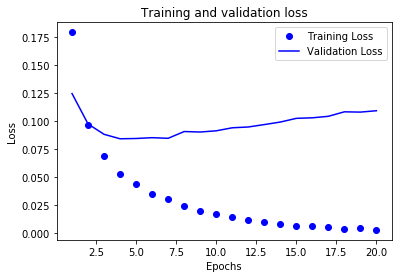

In [18]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=np.arange(1,len(history_dict['acc'])+1)

plt.clf
plt.plot(epochs,loss_values,'bo',label='Training Loss')
plt.plot(epochs,val_loss_values,'b',label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


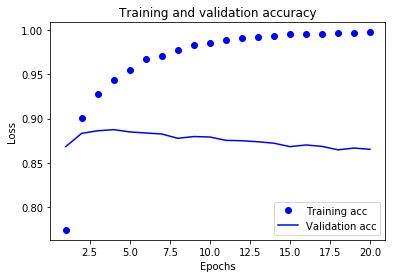

In [24]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retraining a model from scratch

In [40]:
another_model=models.Sequential()
another_model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
another_model.add(layers.Dense(16,activation='relu'))
another_model.add(layers.Dense(1,activation='sigmoid'))

another_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
another_model.fit(x_train,y_train,epochs=4,batch_size=512)

results=another_model.evaluate(x_test,y_test)


Epoch 1/4
25000/25000 [==============================] - 6s 259us/step - loss: 0.4584 - acc: 0.8133
Epoch 2/4
25000/25000 [==============================] - 4s 153us/step - loss: 0.2630 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 3s 134us/step - loss: 0.2005 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 16s 622us/step


In [41]:
results

[0.29883809867858885, 0.88264]

### Using a trained network to generate predictions on new data

In [43]:
another_model.predict(x_test)

array([[0.21083029],
       [0.9994885 ],
       [0.92873967],
       ...,
       [0.14213903],
       [0.10355888],
       [0.70687455]], dtype=float32)

## Try using one or three hidden layers, and see how doing so affects validation and test accuracy

### 1 Layer:

In [44]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
x_val=x_train[:10000]
x_partial=x_train[10000:]
y_val = y_train[:10000]
y_partial = y_train[10000:]
history=model.fit(x_partial,y_partial,epochs=20,batch_size=512,validation_data=(x_val,y_val))
history_dict=history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 481us/step - loss: 0.4915 - acc: 0.7965 - val_loss: 0.3798 - val_acc: 0.8751
Epoch 2/20
15000/15000 [==============================] - 9s 622us/step - loss: 0.3105 - acc: 0.9043 - val_loss: 0.3203 - val_acc: 0.8799
Epoch 3/20
15000/15000 [==============================] - 7s 437us/step - loss: 0.2396 - acc: 0.9258 - val_loss: 0.3005 - val_acc: 0.8806
Epoch 4/20
15000/15000 [==============================] - 5s 345us/step - loss: 0.1976 - acc: 0.9391 - val_loss: 0.2795 - val_acc: 0.8909
Epoch 5/20
15000/15000 [==============================] - 4s 289us/step - loss: 0.1650 - acc: 0.9504 - val_loss: 0.2771 - val_acc: 0.8897
Epoch 6/20
15000/15000 [==============================] - 4s 262us/step - loss: 0.1443 - acc: 0.9563 - val_loss: 0.2768 - val_acc: 0.8895
Epoch 7/20
15000/15000 [==============================] - 4s 238us/step - loss: 0.1252 - acc: 0.9646 - val_loss: 0.2843 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

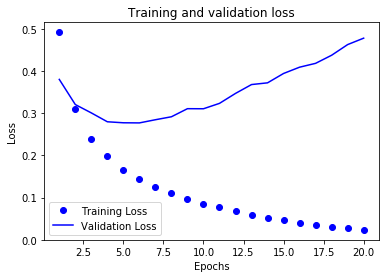

In [48]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=np.arange(1,len(history_dict['acc'])+1)

plt.clf
plt.plot(epochs,loss_values,'bo',label='Training Loss')
plt.plot(epochs,val_loss_values,'b',label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

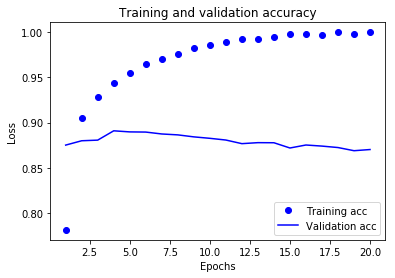

In [47]:

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 3 Layers:

In [49]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
x_val=x_train[:10000]
x_partial=x_train[10000:]
y_val = y_train[:10000]
y_partial = y_train[10000:]
history=model.fit(x_partial,y_partial,epochs=20,batch_size=512,validation_data=(x_val,y_val))
history_dict=history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 292us/step - loss: 0.4955 - acc: 0.8041 - val_loss: 0.3953 - val_acc: 0.8584
Epoch 2/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.3176 - acc: 0.8987 - val_loss: 0.3215 - val_acc: 0.8830
Epoch 3/20
15000/15000 [==============================] - 3s 230us/step - loss: 0.2470 - acc: 0.9239 - val_loss: 0.3048 - val_acc: 0.8792
Epoch 4/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.2028 - acc: 0.9383 - val_loss: 0.2767 - val_acc: 0.8919
Epoch 5/20
15000/15000 [==============================] - 10s 666us/step - loss: 0.1715 - acc: 0.9476 - val_loss: 0.2784 - val_acc: 0.8885
Epoch 6/20
15000/15000 [==============================] - 3s 214us/step - loss: 0.1495 - acc: 0.9553 - val_loss: 0.2739 - val_acc: 0.8902
Epoch 7/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.1287 - acc: 0.9642 - val_loss: 0.2982 -

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

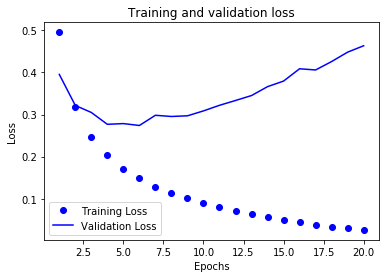

In [52]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=np.arange(1,len(history_dict['acc'])+1)

plt.clf
plt.plot(epochs,loss_values,'bo',label='Training Loss')
plt.plot(epochs,val_loss_values,'b',label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

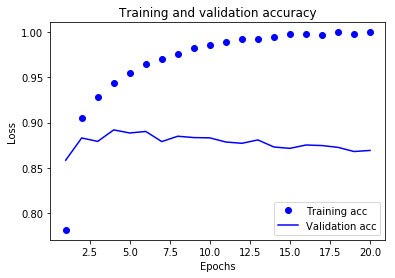

In [53]:

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()